This notebook demonstrates how to use the `DataProcessor`
and `DataClassifier` classes to collect NBA stats and
analyze them to predict NBA game outcomes.  

`DataProcessor` handles the following data pipeline steps:
 - Acquisition
 - Integration
 - Processing
 
`DataClassifier` handles the steps:
 - Select features, parameters, classifiers
 - Classify various models
 - Evaluate
 - Plot results

In [1]:
from src.DataProcessor import DataProcessor
from src.DataClassifier import DataClassifier

`DataProcessor` contains the following methods.

Note you can also call `dp.update_and_process_all_data()`
to run all these methods.

In [9]:
dp = DataProcessor()

These methods scrape player box scores, team box scores, 
and season schedule data for 2000-current seasons using
the scraping utility https://www.basketball-reference.com/. 
Places files in `data_raw` folder.

In [3]:
dp.scrape_data_player_box_scores()
dp.scrape_data_team_box_scores()
dp.scrape_data_season_schedule()


Scraping player box score data.

Player box score data found for season: 1999-2000
Player box score data found for season: 2000-2001
Player box score data found for season: 2001-2002
Player box score data found for season: 2002-2003
Player box score data found for season: 2003-2004
Player box score data found for season: 2004-2005
Player box score data found for season: 2005-2006
Player box score data found for season: 2006-2007
Player box score data found for season: 2007-2008
Player box score data found for season: 2008-2009
Player box score data found for season: 2009-2010
Player box score data found for season: 2010-2011
Player box score data found for season: 2011-2012
Player box score data found for season: 2012-2013
Player box score data found for season: 2013-2014
Player box score data found for season: 2014-2015
Player box score data found for season: 2015-2016
Player box score data found for season: 2016-2017
Player box score data found for season: 2017-2018
Player box score

INTEGRATION, PROCESSING

create_processed_team_box_and_add_season_schedule():
    Creates `data_preprocessed` folder and merges team box
    scores with season schedule.  Adds the following data:
    win/loss, home/away, opponent, opponent score.

add_fgp_tpp_tr_to_processed_team_box():
    Adds derived features recommended by professional 
    NBA analysts to preprocessed data.

write_complete_processed_team_box():
    Writes single csv file for classification and validation phase.

In [4]:
dp.create_processed_team_box_and_add_season_schedule()
dp.add_fgp_tpp_tr_to_processed_team_box()
dp.write_complete_processed_team_box()


Adding season schedule to team box scores (e.g, win/loss, total pts).

Merged team box score data found for season: 2000-2001
Merged team box score data found for season: 2001-2002
Merged team box score data found for season: 2002-2003
Merged team box score data found for season: 2003-2004
Merged team box score data found for season: 2004-2005
Merged team box score data found for season: 2005-2006
Merged team box score data found for season: 2006-2007
Merged team box score data found for season: 2007-2008
Merged team box score data found for season: 2008-2009
Merged team box score data found for season: 2009-2010
Merged team box score data found for season: 2010-2011
Merged team box score data found for season: 2011-2012
Merged team box score data found for season: 2012-2013
Merged team box score data found for season: 2013-2014
Merged team box score data found for season: 2014-2015
Merged team box score data found for season: 2015-2016
Merged team box score data found for season: 201

`DataClassifier` contains methods for modeling,
classifying, and evaluating NBA game prediction methods.

In [2]:
dc = DataClassifier()

MODELING, EVALUATION

In [3]:
# Loads complete preprocessed data set.
dc.load_data()


# Selects features and labels for modeling.
feats = ["attempted_field_goals", \
         "field_goal_percentage",\
         "three_point_percentage",\
         "made_free_throws",\
         "defensive_rebounds",\
         "total_rebounds",
         "turnovers",\
         "personal_fouls"]
labels = ["outcome"]
skip_playoffs = True
start_year = 2007
end_year = 2020
#start_year = 2018
#end_year = 2020
dc.set_feats_and_labels(feats=feats, labels=labels, \
                        skip_playoffs=skip_playoffs, \
                        start_year=start_year, \
                        end_year=end_year)


# Sets data shuffling parameters.
n_splits = 1
test_size = 0.2
dc.set_train_test_split(n_splits=n_splits, \
                        test_size=test_size, rng_seed=0)


# Sets classifiers from scikit-learn
classifiers = ["KNN", \
               "DTC", \
               "RFC", \
               "ABC",\
               "GBC", \
               "GNB", \
               "LDA", \
               "QDA", \
               "LR"]
dc.set_classifiers(classifiers=classifiers)


Loading model from processed data.



Trains and tests/evaluates all classification models.
Shuffles data for cross-validation using 
StratifiedShuffleSplit (stratified k-fold with shuffling). 
Logs results.

In [4]:
dc.train_and_test_models(verbose=True)

KNeighborsClassifier
****Results****
Accuracy : 63.7375%
Log Loss : 4.1088739
DecisionTreeClassifier
****Results****
Accuracy : 71.1122%
Log Loss : 9.9774842
RandomForestClassifier
****Results****
Accuracy : 77.8758%
Log Loss : 0.80817659
AdaBoostClassifier
****Results****
Accuracy : 79.5892%
Log Loss : 0.67844543
GradientBoostingClassifier
****Results****
Accuracy : 79.9198%
Log Loss : 0.42599609
GaussianNB
****Results****
Accuracy : 78.5972%
Log Loss : 0.44605678
LinearDiscriminantAnalysis
****Results****
Accuracy : 80.6413%
Log Loss : 0.4093293
QuadraticDiscriminantAnalysis
****Results****
Accuracy : 80.3307%
Log Loss : 0.41202089
LogisticRegression
****Results****
Accuracy : 80.3707%
Log Loss : 0.42070617


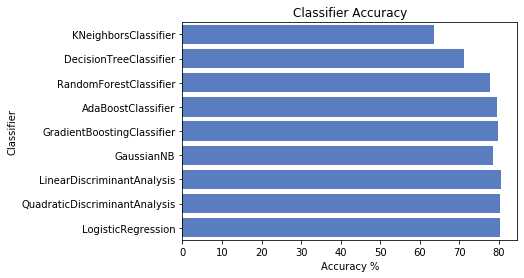

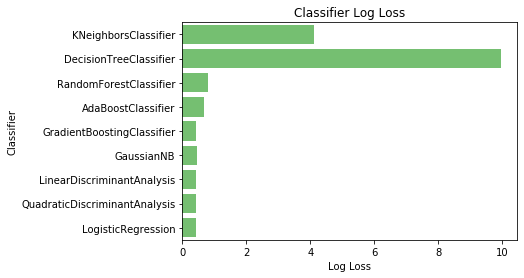

In [5]:
# Plots classifier accuracy and log loss.
dc.plot_results()